
## Data Science Class with Onoja Anthony, PhD (Email: donmaston09@gmail.com)
### Follow our Page on FaceBook: DataEdge Academy
### Subscribe to our YouTube channel: @tonyonoja7880
#### Note: to run this script, you have to install the relevant Python packages and the datasets.

### Introduction

Feature selection is a critical step in the machine learning pipeline that involves identifying the most relevant variables (features) in a dataset that contribute significantly to the prediction of a target outcome. By reducing the number of features, we can improve model performance, reduce overfitting, enhance interpretability, and decrease computational cost.

In this hands-on session, we will explore feature selection techniques using a real-world dataset focused on teenage mental health and stress levels. The dataset integrates information from social media activity, wearable devices, and self-reported surveys. Our goal is to identify which behavioral and physiological factors most strongly correlate with high stress levels among adolescents.

Participants will learn how to:

- Preprocess and explore high-dimensional health data

- Apply filter, wrapper, and embedded methods for feature selection

- Use models like Random Forests and logistic regression to assess feature importance

- Interpret selected features to generate meaningful public health insights

By the end of the session, you’ll have a practical understanding of how feature selection can enhance model accuracy and reveal key predictors of mental health outcomes.


####  Uncovering Stress Patterns in Teenagers Using Machine Learning

This dataset aims to support the analysis of mental health patterns among teenagers, with a particular focus on stress levels. It comprises 5,000 anonymised records, each containing 11 variables that capture diverse aspects of daily behavior and well-being, including social media activity, survey responses, and data from wearable devices. The primary objective is to uncover correlations between behavioral factors—such as screen time, physical activity, and sleep patterns—and reported stress levels. This dataset offers valuable potential for advancing research in adolescent mental health, enabling early detection of stress, and informing preventive care strategies.

#### Aim 1
To identify key behavioral and physiological indicators associated with elevated stress levels in teenagers, using advanced feature selection techniques.

#### Aim 2
To develop and validate a robust machine learning model capable of predicting teens' stress levels based on multi-source behavioral data (social media, surveys, wearables).



#### Objectives
##### Data Preprocessing & Exploration

- Clean and preprocess the dataset (handle missing values, normalize features, encode categorical variables).

- Conduct exploratory data analysis to understand the distribution and relationship between variables (e.g., time on social media vs. stress).

##### Feature Engineering

- Create new variables or composite metrics (e.g., “daily screen time to sleep ratio”, “weekly physical activity average”).

- Transform time-based data into usable formats (e.g., circadian rhythm features from sleep times).

##### Feature Selection

- Apply multiple feature selection techniques (e.g., Filter - correlation, Mutual Information, Wrapper - Recursive Feature Elimination, Sequential Forward Selection, Emebbedded - LASSO, Random Forest Feature importance).

- Compare results and select a subset of the most predictive and interpretable features.

##### Model Development

- Train multiple machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting, SVM) to predict stress levels.

- Use cross-validation and performance metrics (accuracy, F1-score, AUC) to evaluate and compare models.

##### Model Interpretation

- Use model explainability techniques (e.g., SHAP, LIME) to interpret the influence of each selected feature on predictions.

- Identify actionable behavioral insights that could be used for early stress detection or preventive interventions.

##### Deployment/Translation (Optional)

Develop a lightweight predictive tool that could be integrated into wellness apps or school-based interventions for early stress alerts (if project scope allows).

In [ ]:
#!pip install mlxtend

In [2]:
# Load the required packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import kagglehub
import zipfile
import os
import warnings
%matplotlib inline
# Suppress all warnings
warnings.filterwarnings('ignore')


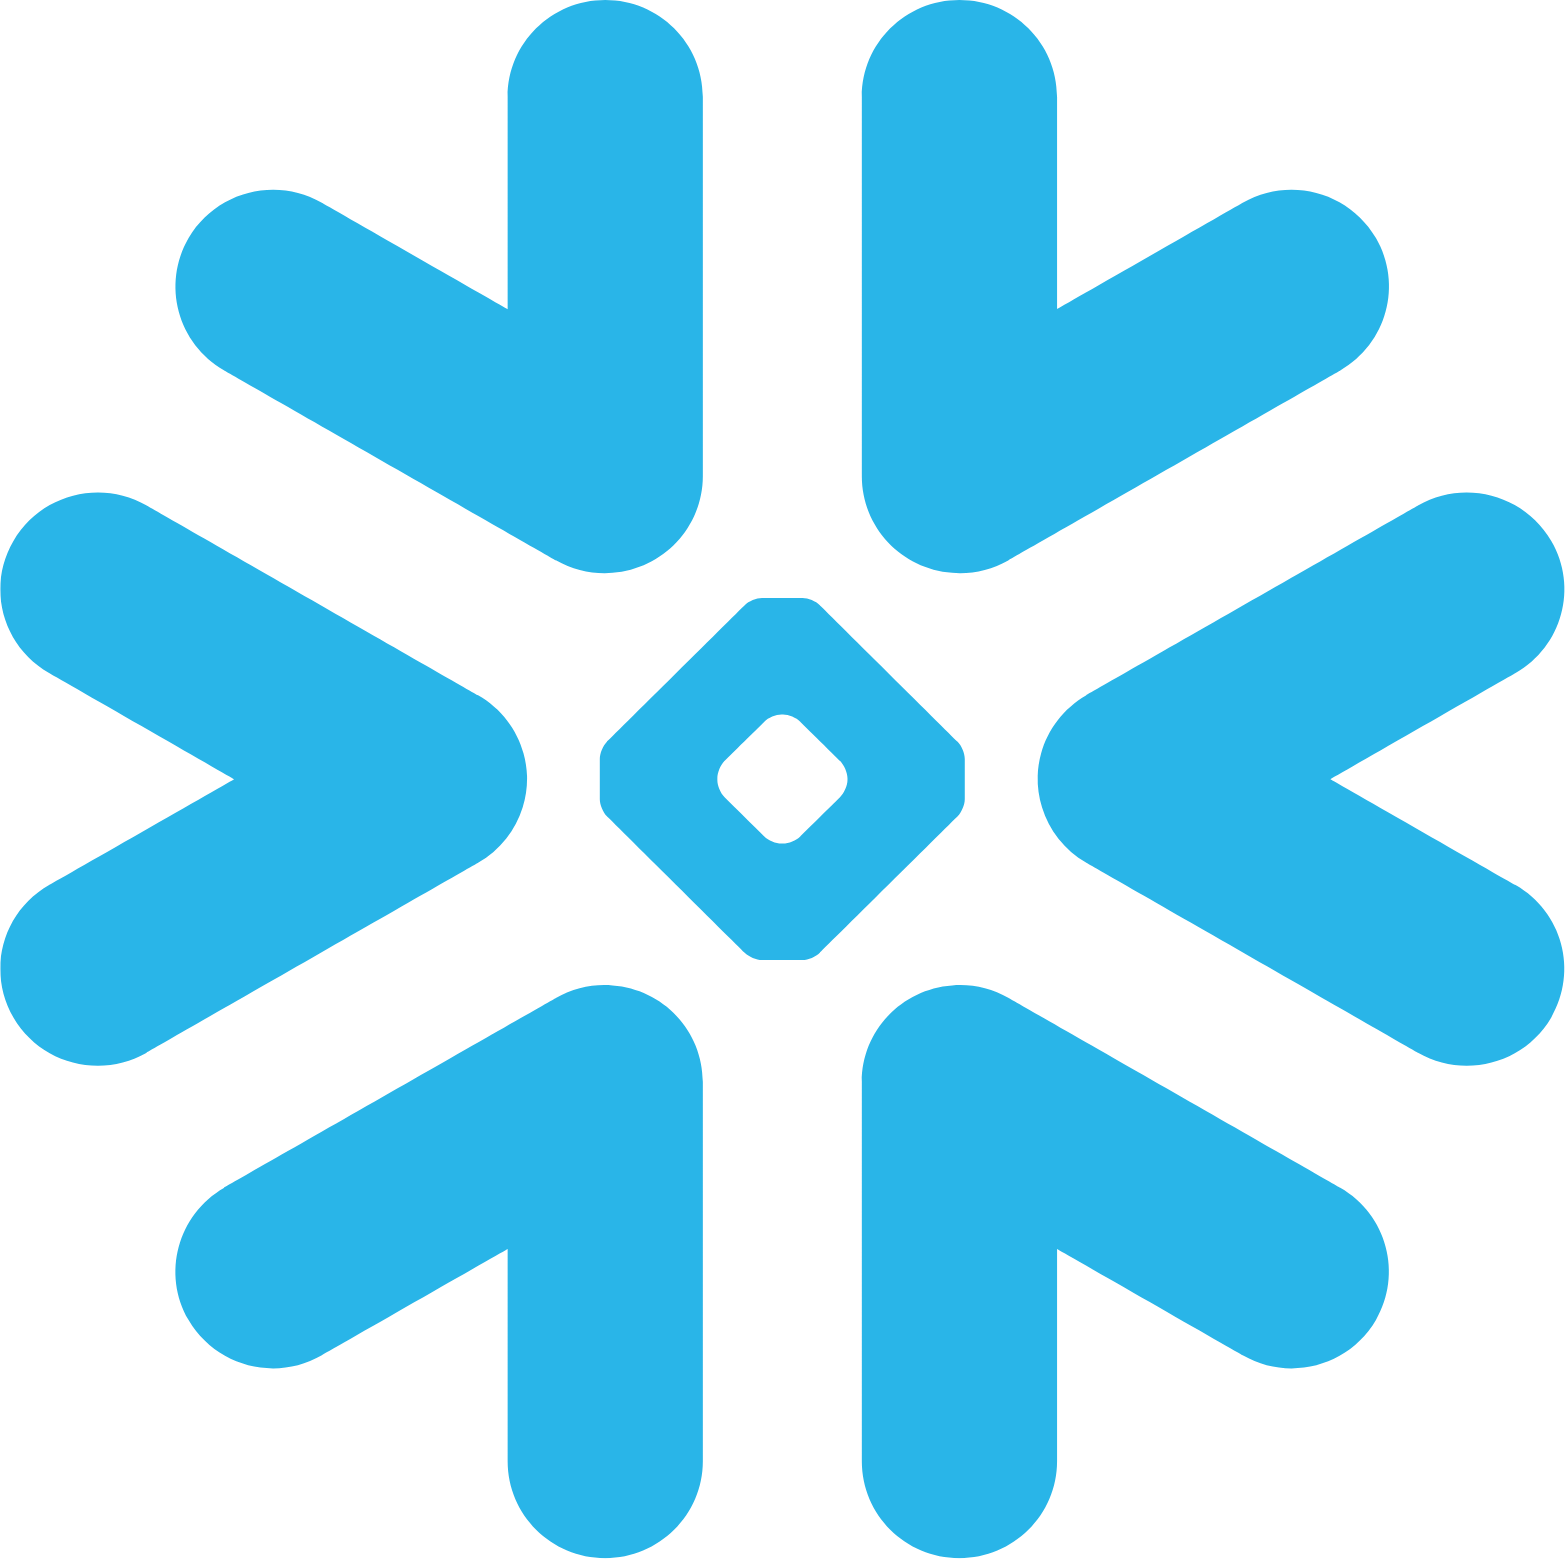

In [3]:
# Download latest version
path = kagglehub.dataset_download("aniruddhawankhede/mental-heath-analysis-among-teenagers")

csv_file_path = os.path.join(path, "mental_health_analysis.csv") #or what ever the csv file is called.
df = pd.read_csv(csv_file_path)

df.head()

#### Data Preprocessing & Exploration Step

In [4]:
# Check for missing values and data types
missing_values = df.isna().sum()
data_types = df.dtypes
print("Missing values in each column:")
print(missing_values)
print("\nData types of each column:")
print(data_types) 

Missing values in each column:
User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

Data types of each column:
User_ID                    int64
Age                        int64
Gender                    object
Social_Media_Hours       float64
Exercise_Hours           float64
Sleep_Hours              float64
Screen_Time_Hours        float64
Survey_Stress_Score        int64
Wearable_Stress_Score    float64
Support_System            object
Academic_Performance      object
dtype: object


#### Exploratory Data Analysis phase

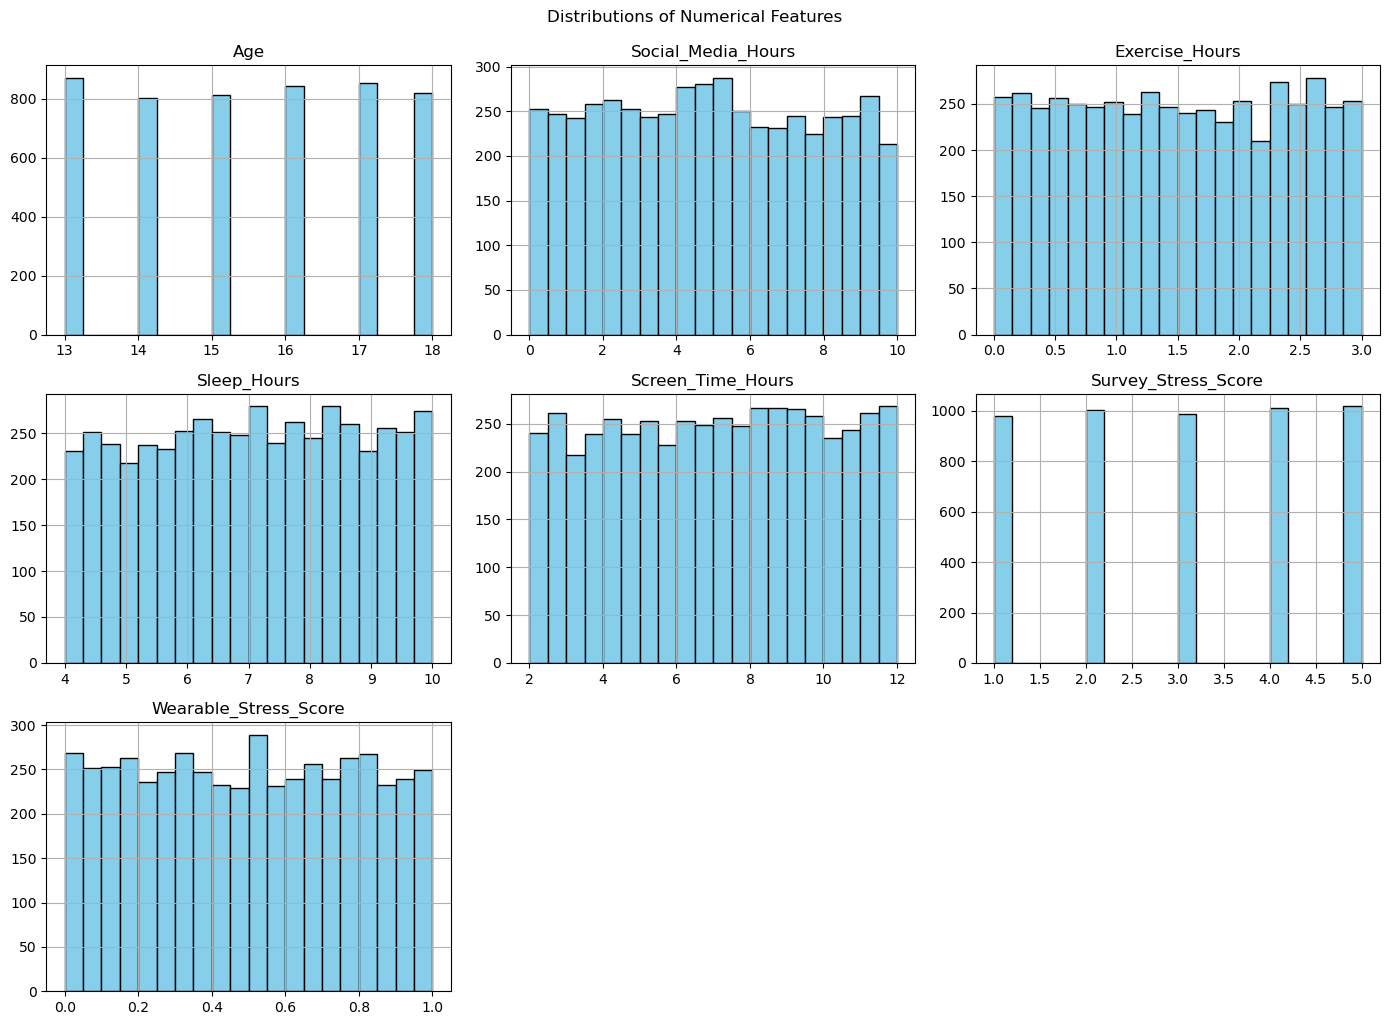

In [5]:
# Visualize distributions for numerical features
import matplotlib.pyplot as plt
num_cols = ['Age', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours',
            'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score']

df[num_cols].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle("Distributions of Numerical Features", y=1.02)
plt.show()

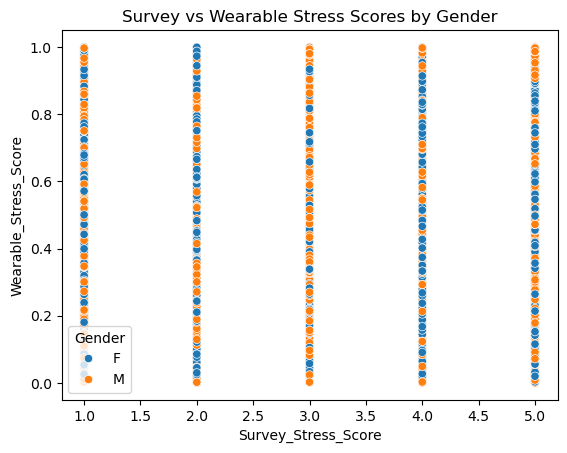

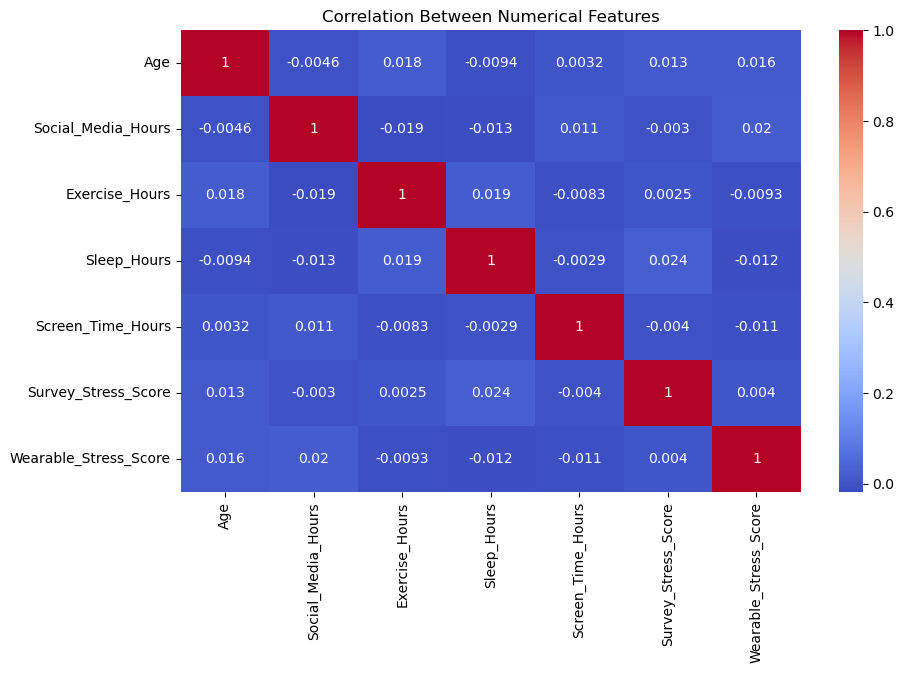

In [6]:
# Understand Stress Levels (Survey vs Wearable)
import seaborn as sns
# Relationship between both stress scores
sns.scatterplot(data=df, x='Survey_Stress_Score', y='Wearable_Stress_Score', hue='Gender')
plt.title("Survey vs Wearable Stress Scores by Gender")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

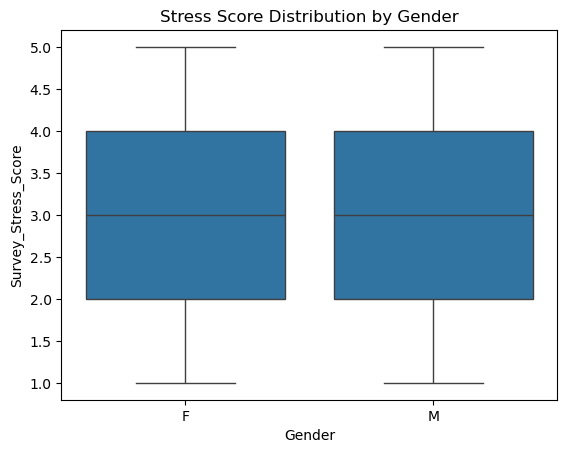

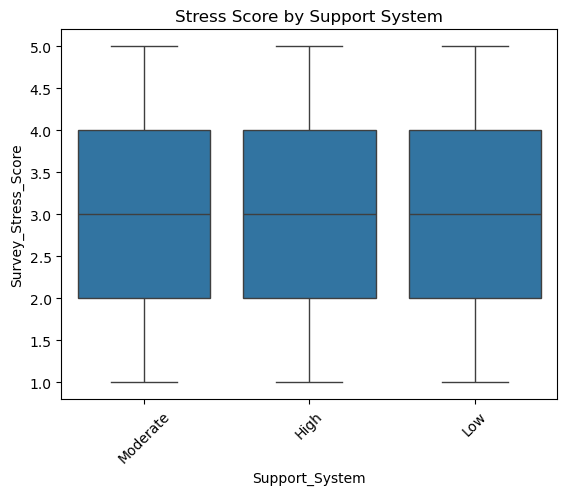

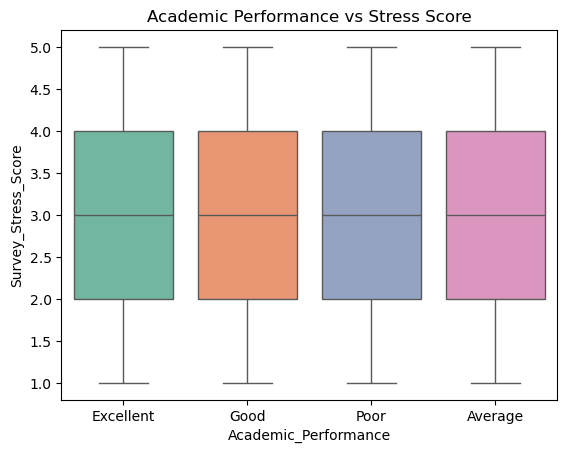

In [7]:
# Group Comparisons & Behavioral Trends

# Stress by Gender
sns.boxplot(data=df, x='Gender', y='Survey_Stress_Score')
plt.title("Stress Score Distribution by Gender")
plt.show()

# Stress by Support System
sns.boxplot(data=df, x='Support_System', y='Survey_Stress_Score')
plt.title("Stress Score by Support System")
plt.xticks(rotation=45)
plt.show()

# Academic performance and stress
sns.boxplot(data=df, x='Academic_Performance', y='Survey_Stress_Score', palette='Set2')
plt.title("Academic Performance vs Stress Score")
plt.show()

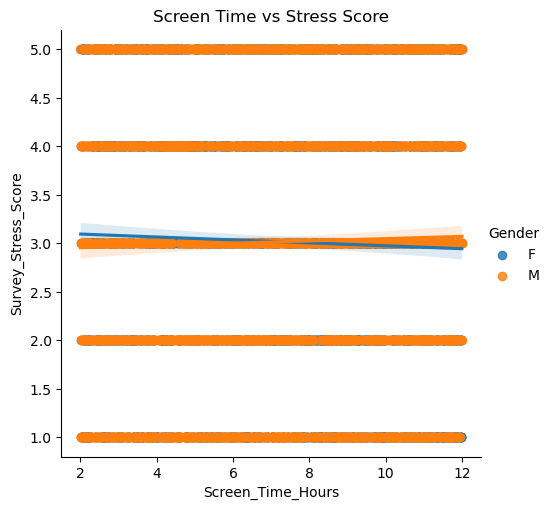

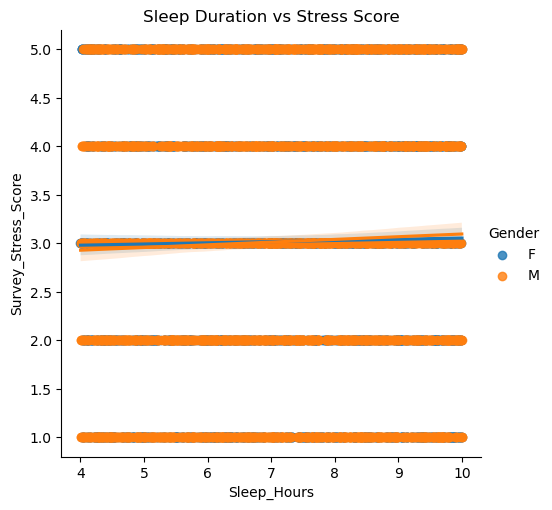

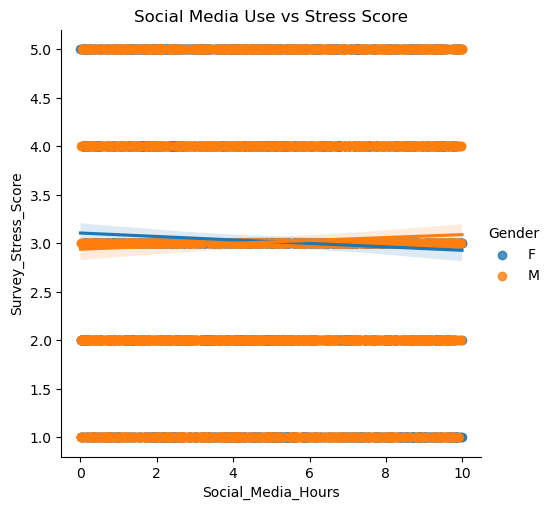

In [8]:
# Explore Bivariate Relationships of Interest

# Screen time vs stress
sns.lmplot(data=df, x='Screen_Time_Hours', y='Survey_Stress_Score', hue='Gender')
plt.title("Screen Time vs Stress Score")
plt.show()

# Sleep vs stress
sns.lmplot(data=df, x='Sleep_Hours', y='Survey_Stress_Score', hue='Gender')
plt.title("Sleep Duration vs Stress Score")
plt.show()

# Social media vs stress
sns.lmplot(data=df, x='Social_Media_Hours', y='Survey_Stress_Score', hue='Gender')
plt.title("Social Media Use vs Stress Score")
plt.show()

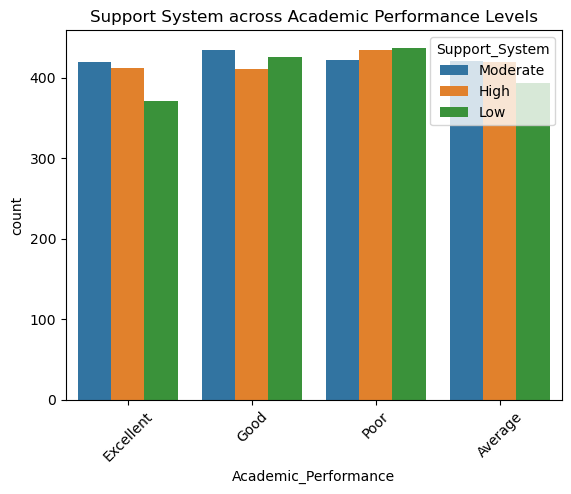

In [9]:
# Support System and Academic Performance
pd.crosstab(df['Support_System'], df['Academic_Performance'])

# Count plots
sns.countplot(data=df, x='Academic_Performance', hue='Support_System')
plt.title("Support System across Academic Performance Levels")
plt.xticks(rotation=45)
plt.show()

### Feature Engineering Phase

In [10]:
# Create new composite features
df['screen_sleep_ratio'] = df['Screen_Time_Hours'] / (df['Sleep_Hours'] + 1)
df['exercise_sleep_ratio'] = df['Exercise_Hours'] / (df['Sleep_Hours'] + 1)
df['social_sleep_ratio'] = df['Social_Media_Hours'] / (df['Sleep_Hours'] + 1)



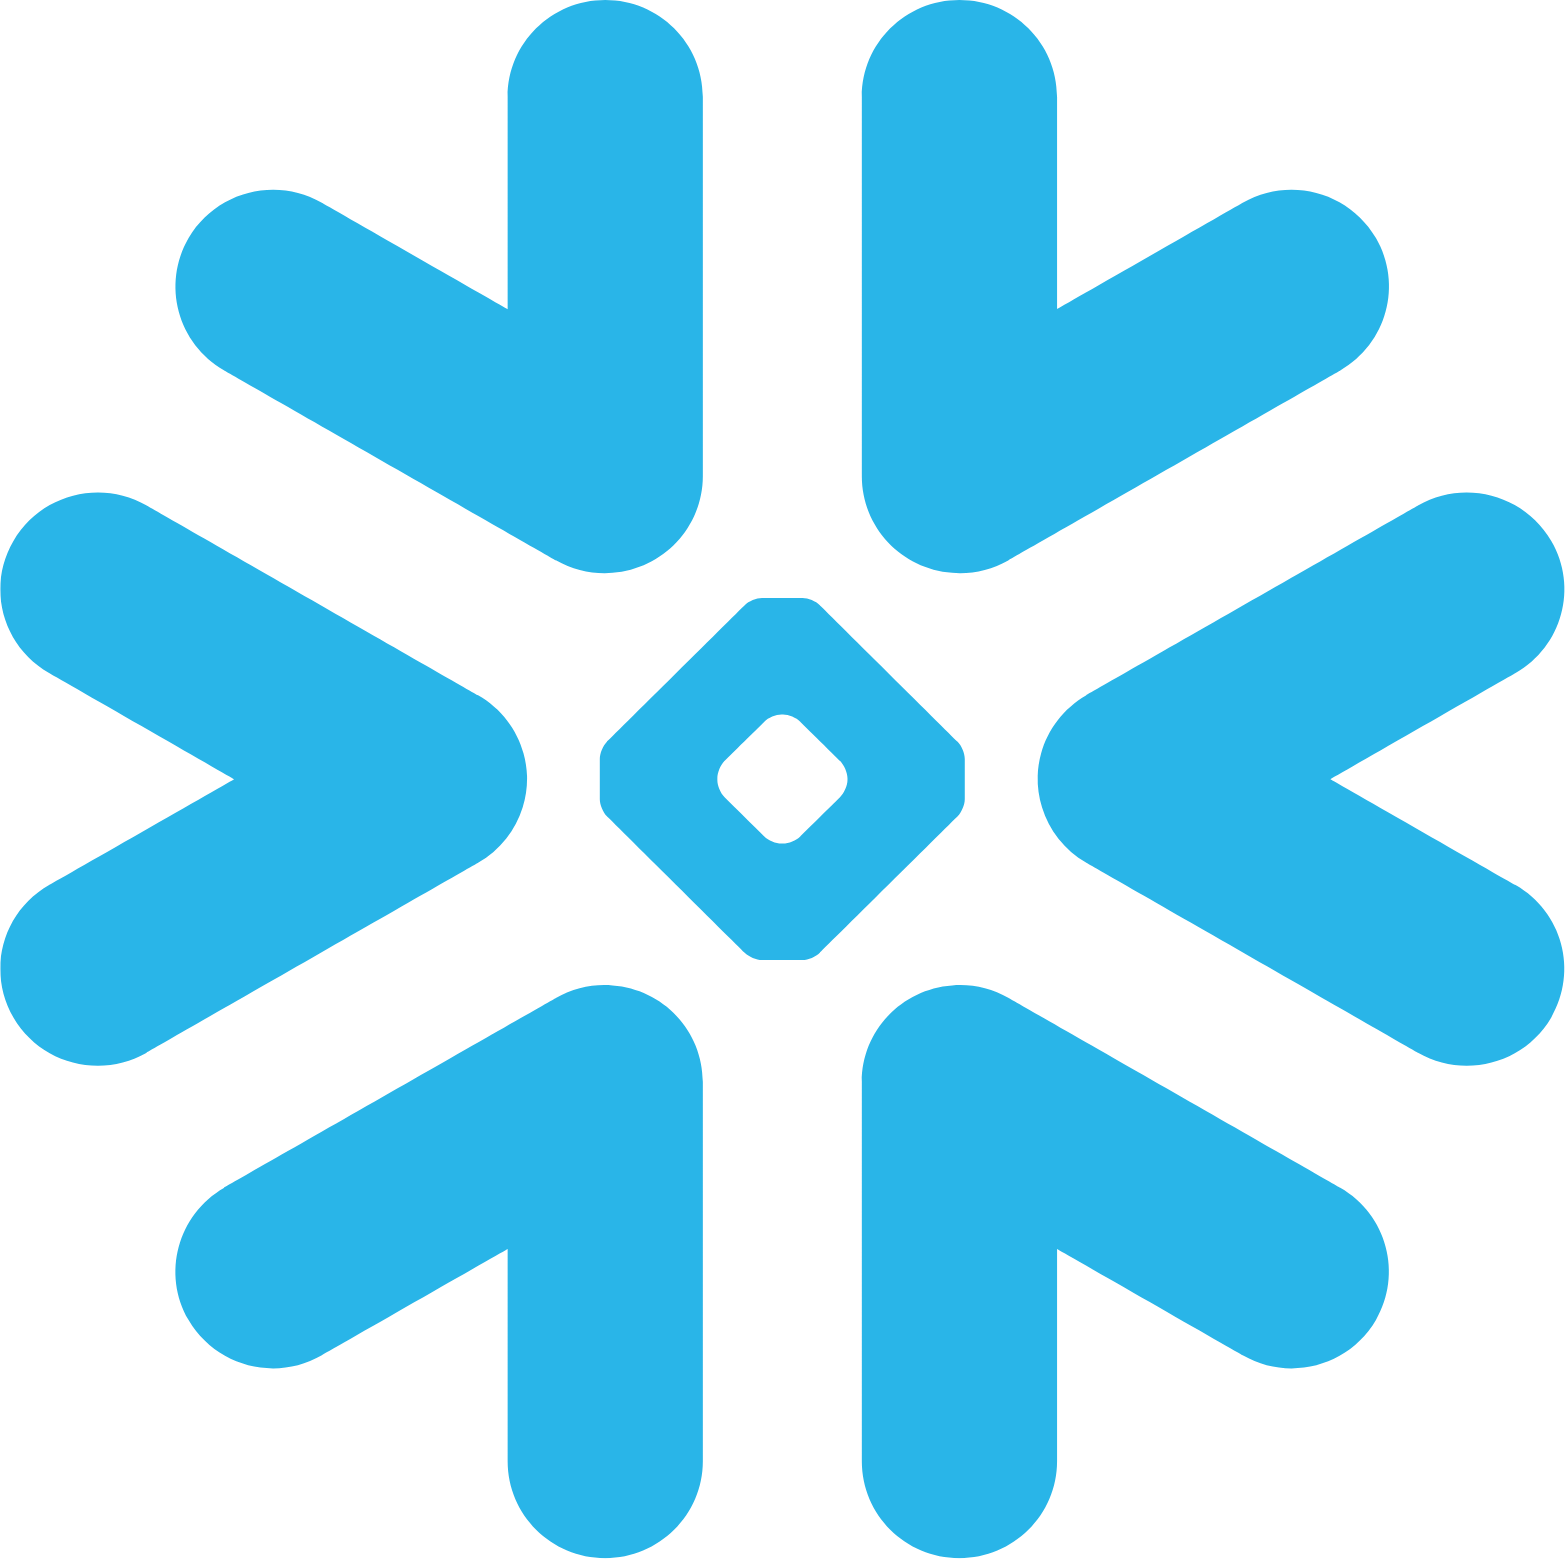

In [11]:
df.head()

### Feature Selection Phase

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Social_Media_Hours     5000 non-null   float64
 4   Exercise_Hours         5000 non-null   float64
 5   Sleep_Hours            5000 non-null   float64
 6   Screen_Time_Hours      5000 non-null   float64
 7   Survey_Stress_Score    5000 non-null   int64  
 8   Wearable_Stress_Score  5000 non-null   float64
 9   Support_System         5000 non-null   object 
 10  Academic_Performance   5000 non-null   object 
 11  screen_sleep_ratio     5000 non-null   float64
 12  exercise_sleep_ratio   5000 non-null   float64
 13  social_sleep_ratio     5000 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 547.0+ 

In [13]:
# Define numerical and categorical variables 
numerical_cols = [
    'Age', 
    'Social_Media_Hours', 
    'Exercise_Hours', 
    'Sleep_Hours', 
    'Screen_Time_Hours', 
    'Survey_Stress_Score'
]

categorical_nominal = ['Gender']  # Binary (M/F)
categorical_ordinal = [
    'Support_System',          # Likely ordinal (e.g., Low/Moderate/High)
    'Academic_Performance'     # Likely ordinal (e.g., Poor/Average/Good)
]

In [14]:
from sklearn.model_selection import train_test_split

# Example: Using Wearable_Stress_Score as target (adjust as needed)
y = df['Wearable_Stress_Score']
X = df.drop('Wearable_Stress_Score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
df['Support_System'].value_counts()

Support_System
Moderate    1696
High        1677
Low         1627
Name: count, dtype: int64

In [15]:
## Preprocessing Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder, 
    OrdinalEncoder
)

# Define ordinal category orders 
support_order = ['Low', 'Moderate', 'High']  
academic_order = ['Poor', 'Average', 'Good', 'Excellent']

preprocessor = ColumnTransformer(
    transformers=[
        # Numerical pipeline: Impute missing
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),

        # Nominal pipeline: Impute - One-hot encode
        ('cat_nominal', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_nominal),

        # Ordinal pipeline: Impute → Ordinal encode
        ('cat_ordinal', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder(categories=[support_order, academic_order]))
        ]), categorical_ordinal)
    ])

In [16]:
# Use previous preprocessing pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after preprocessing
num_features = numerical_cols
cat_nominal_features = preprocessor.named_transformers_['cat_nominal'].get_feature_names_out()
cat_ordinal_features = categorical_ordinal
all_features = num_features + list(cat_nominal_features) + cat_ordinal_features

### 1. Filter Methods

#### Correlation Analysis

In [17]:
# import the necessary packages
from sklearn.feature_selection import SelectKBest, f_regression

# Pearson correlation
corr_matrix = pd.DataFrame(X_train_preprocessed, columns=all_features).corrwith(y_train)
abs_corr_values = corr_matrix.abs().sort_values(ascending=False)
corr_features = abs_corr_values.nlargest(5).index.tolist()  # Top 5
corr_values_top5 = abs_corr_values[corr_features]


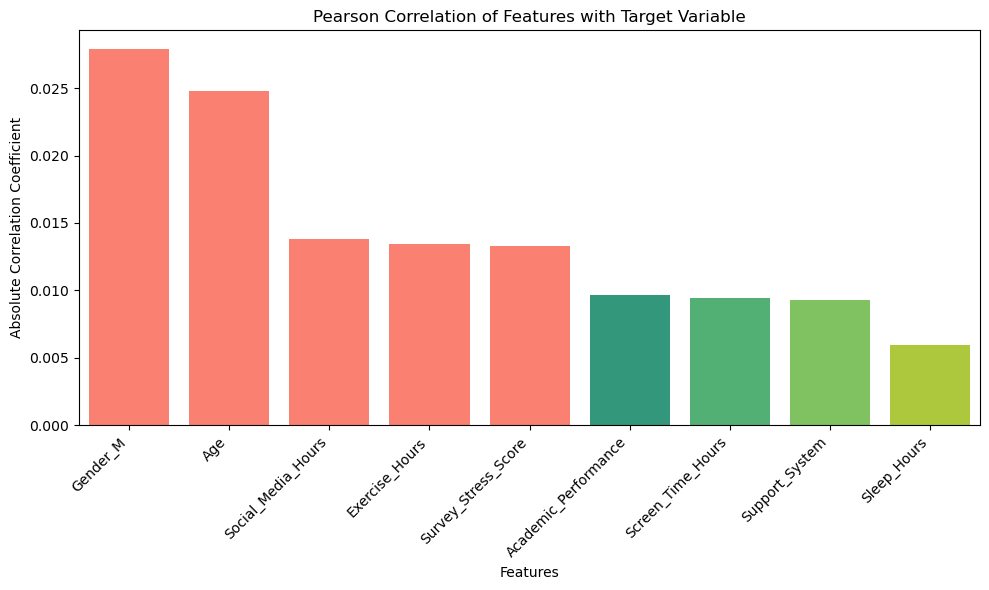

In [18]:
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=abs_corr_values.index, y=abs_corr_values.values, palette="viridis")
plt.title('Pearson Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Highlight the top 5 features
top_5_indices = [i for i, feature in enumerate(abs_corr_values.index) if feature in corr_features]
for index in top_5_indices:
    plt.gca().patches[index].set_facecolor('salmon')

plt.show()


In [19]:
print(f"Top 5 features by Pearson correlation: {corr_features}")

Top 5 features by Pearson correlation: ['Gender_M', 'Age', 'Social_Media_Hours', 'Exercise_Hours', 'Survey_Stress_Score']


In [ ]:
#### Analysis of Variance (ANOVA) Approach

In [20]:
# ANOVA F-test
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train_preprocessed, y_train)
anova_features = [all_features[i] for i in selector.get_support(indices=True)]
anova_scores = pd.Series(selector.scores_, index=all_features).sort_values(ascending=False)

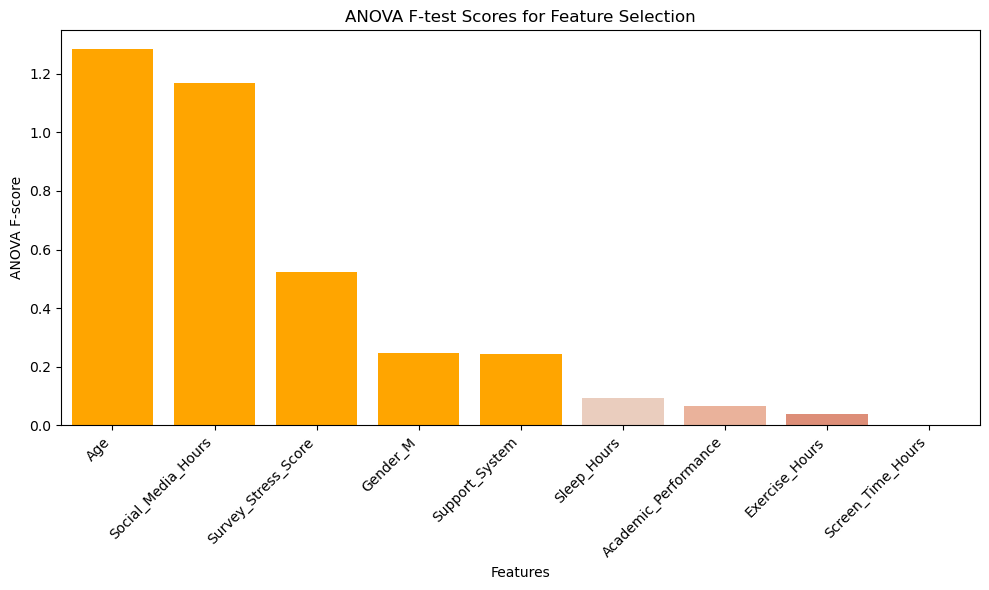

In [21]:
# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=anova_scores.index, y=anova_scores.values, palette="coolwarm")
plt.title('ANOVA F-test Scores for Feature Selection')
plt.xlabel('Features')
plt.ylabel('ANOVA F-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Highlight the top 5 selected features
top_5_anova_indices = [i for i, feature in enumerate(anova_scores.index) if feature in anova_features]
for index in top_5_anova_indices:
    plt.gca().patches[index].set_facecolor('orange')

plt.show()

In [22]:
print(f"Top 5 features by ANOVA F-test: {anova_features}")

Top 5 features by ANOVA F-test: ['Age', 'Social_Media_Hours', 'Survey_Stress_Score', 'Gender_M', 'Support_System']


In [ ]:
#!pip install matplotlib-venn


Features selected by both methods: ['Social_Media_Hours', 'Age', 'Gender_M', 'Survey_Stress_Score']


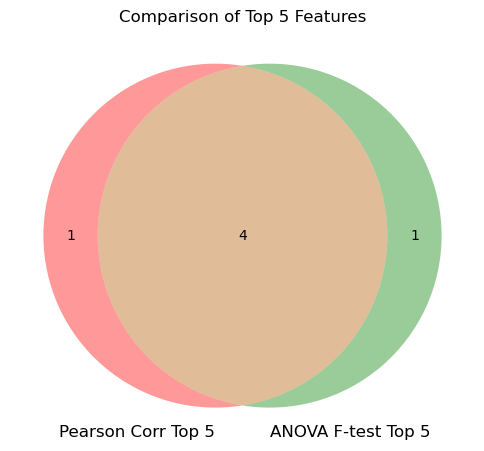

In [23]:
# Find common features
common_features = list(set(corr_features) & set(anova_features))
print(f"\nFeatures selected by both methods: {common_features}")

# create a Venn diagram 
# Install the 'matplotlib-venn' library if you haven't: pip install matplotlib-venn
from matplotlib_venn import venn2

plt.figure(figsize=(6, 6))
venn2([set(corr_features), set(anova_features)], set_labels=('Pearson Corr Top 5', 'ANOVA F-test Top 5'))
plt.title('Comparison of Top 5 Features')
plt.show()

### 2. Wrapper Methods

##### Recursive Feature Elimination (RFE)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(RandomForestRegressor(n_estimators=50), n_features_to_select=5)
rfe.fit(X_train_preprocessed, y_train)
rfe_features = [all_features[i] for i in np.where(rfe.support_)[0]]

In [25]:
# Get feature ranking
ranking_df = pd.DataFrame({'Feature': all_features, 'Ranking': rfe.ranking_})
ranking_df_sorted = ranking_df.sort_values(by='Ranking')

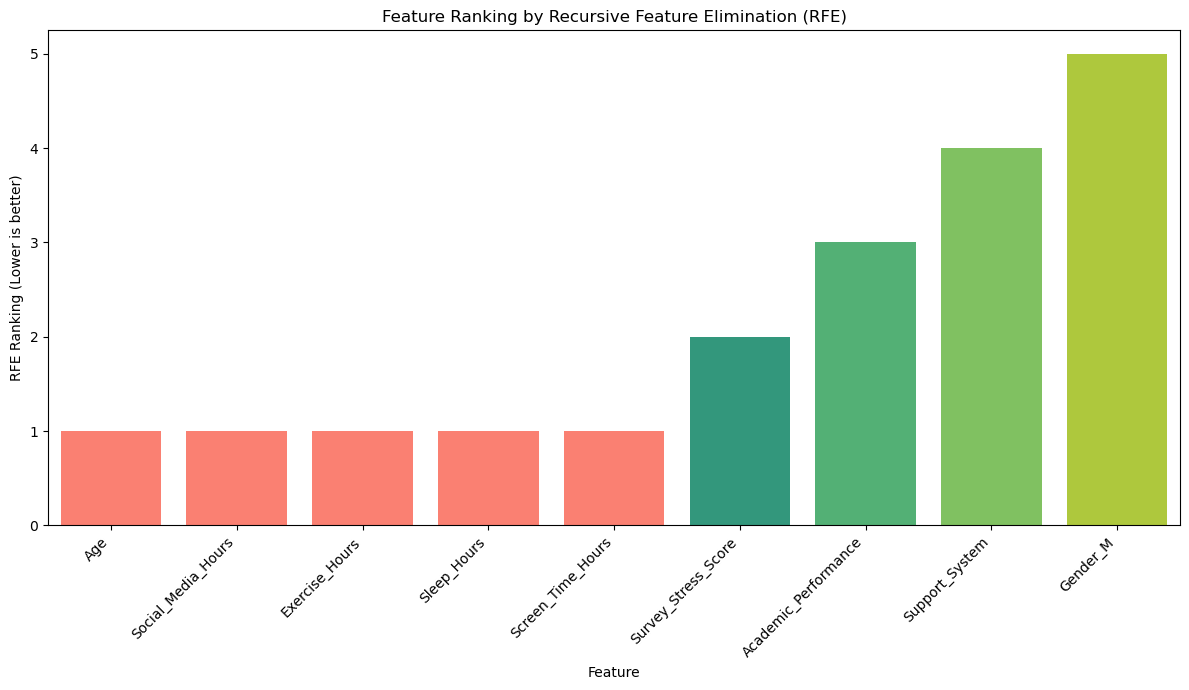

In [26]:
# Visualisation of Feature Ranking
plt.figure(figsize=(12, 7))
sns.barplot(x='Feature', y='Ranking', data=ranking_df_sorted, palette='viridis')
plt.title('Feature Ranking by Recursive Feature Elimination (RFE)')
plt.xlabel('Feature')
plt.ylabel('RFE Ranking (Lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Highlight the top 5 selected features
top_5_rfe_features = ranking_df_sorted[ranking_df_sorted['Ranking'] == 1]['Feature'].tolist()
for i, feature in enumerate(ranking_df_sorted['Feature']):
    if feature in top_5_rfe_features:
        plt.gca().patches[i].set_facecolor('salmon')

plt.show()

In [27]:
print(f"Top 5 features selected by RFE: {rfe_features}")

Top 5 features selected by RFE: ['Age', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours']


#### Sequential Feature Selection

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
sfs = SequentialFeatureSelector(
    LinearRegression(),
    n_features_to_select=5,
    direction='forward'
)
sfs.fit(X_train_preprocessed, y_train)
sfs_features = [all_features[i] for i in np.where(sfs.support_)[0]]

In [29]:
print("Top 5 features selected by Sequential Forward Selection:", sfs_features)

Top 5 features selected by Sequential Forward Selection: ['Age', 'Sleep_Hours', 'Survey_Stress_Score', 'Support_System', 'Academic_Performance']


In [30]:
# Make the selected features from both rfe and sfs lists
rfe_features_set = set(rfe_features)

sfs_features_set = set(sfs_features)


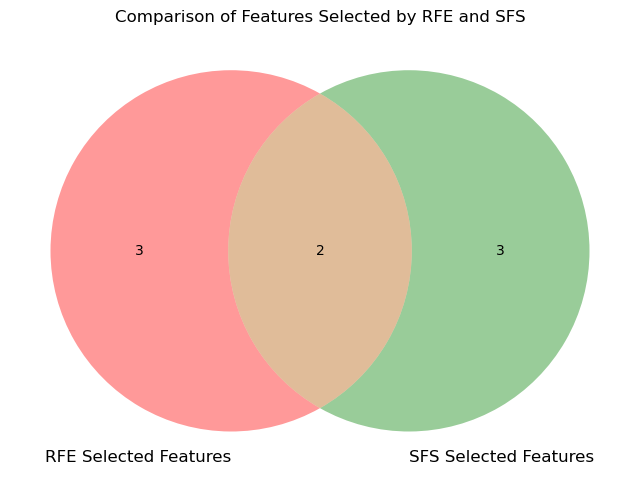

Features selected by RFE: {'Social_Media_Hours', 'Screen_Time_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Age'}
Features selected by SFS: {'Survey_Stress_Score', 'Academic_Performance', 'Support_System', 'Sleep_Hours', 'Age'}


In [31]:
# Create Venn Diagram
plt.figure(figsize=(8, 8))
venn2([rfe_features_set, sfs_features_set], set_labels=('RFE Selected Features', 'SFS Selected Features'))
plt.title('Comparison of Features Selected by RFE and SFS')
plt.show()

# Print the sets of selected features for clarity
print("Features selected by RFE:", rfe_features_set)
print("Features selected by SFS:", sfs_features_set)

### Embedded Methods

####  Lasso Regression

In [33]:
from sklearn.linear_model import LassoCV

# It's crucial to scale the data for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

# LassoCV for feature selection
lasso = LassoCV(cv=5).fit(X_train_scaled, y_train)
lasso_coeffs = pd.Series(lasso.coef_, index=all_features)
lasso_features_mask = np.abs(lasso_coeffs) > 0.01
lasso_features = lasso_coeffs[lasso_features_mask].index.tolist()


In [34]:
# Print the optimal alpha value chosen by LassoCV
print("Optimal alpha chosen by LassoCV:", lasso.alpha_)

# Print the Lasso coefficients
print("\nLasso Coefficients:")
print(lasso_coeffs)

Optimal alpha chosen by LassoCV: 0.0051927997442263885

Lasso Coefficients:
Age                     7.105427e-18
Social_Media_Hours      0.000000e+00
Exercise_Hours         -0.000000e+00
Sleep_Hours            -0.000000e+00
Screen_Time_Hours       0.000000e+00
Survey_Stress_Score     0.000000e+00
Gender_M                0.000000e+00
Support_System          0.000000e+00
Academic_Performance   -0.000000e+00
dtype: float64


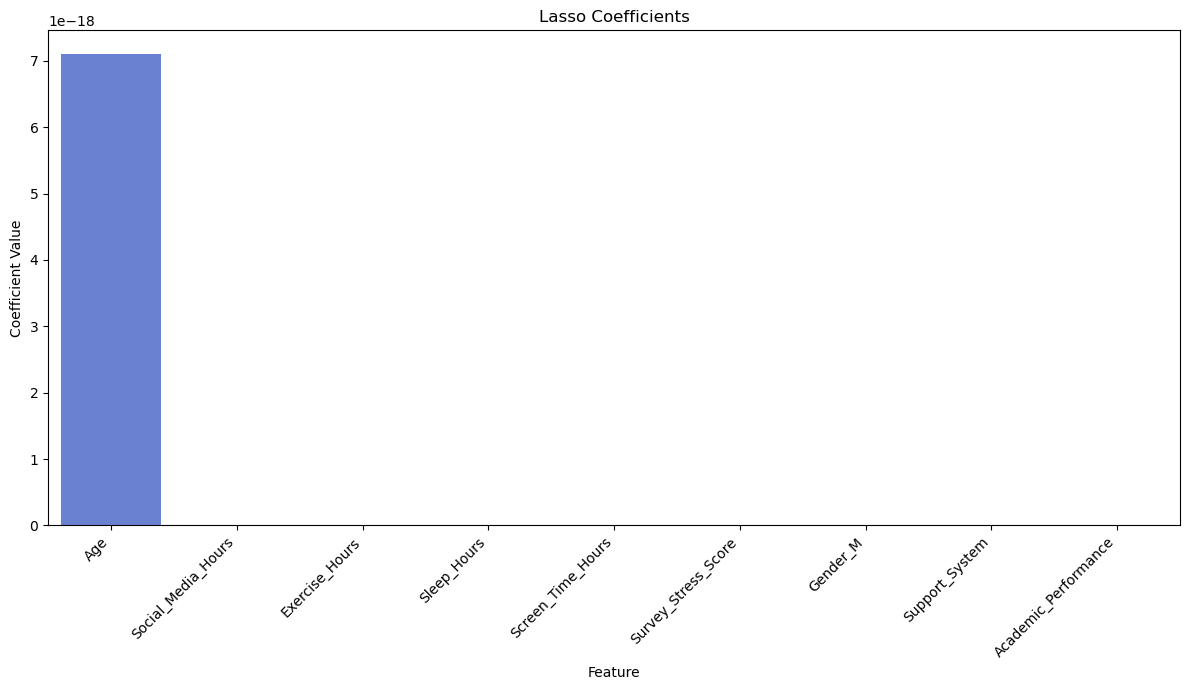

In [35]:
# Visualisation of Lasso Coefficients
plt.figure(figsize=(12, 7))
sns.barplot(x=lasso_coeffs.index, y=lasso_coeffs.values, palette='coolwarm')
plt.title('Lasso Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')

# Highlight features with coefficients > 0.01 or < -0.01
highlighted_features = lasso_coeffs[np.abs(lasso_coeffs) > 0.004].index.tolist()
for i, feature in enumerate(lasso_coeffs.index):
    if feature in highlighted_features:
        plt.gca().patches[i].set_facecolor('salmon')

plt.tight_layout()
plt.show()

In [36]:
# Print the selected features based on the threshold
print("\nFeatures selected by Lasso (absolute coefficient > 0.004):", lasso_features)

# You can also print the features with non-zero coefficients (regardless of the threshold)
lasso_nonzero_features = lasso_coeffs[lasso_coeffs != 0].index.tolist()
print("\nFeatures with non-zero Lasso coefficients:", lasso_nonzero_features)


Features selected by Lasso (absolute coefficient > 0.004): []

Features with non-zero Lasso coefficients: ['Age']


### Random Forest Importance

In [37]:
# Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_preprocessed, y_train)
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=all_features).sort_values(ascending=False)
rf_top_5_features = feature_importances.nlargest(5).index.tolist()
rf_features = feature_importances.nlargest().index.tolist()

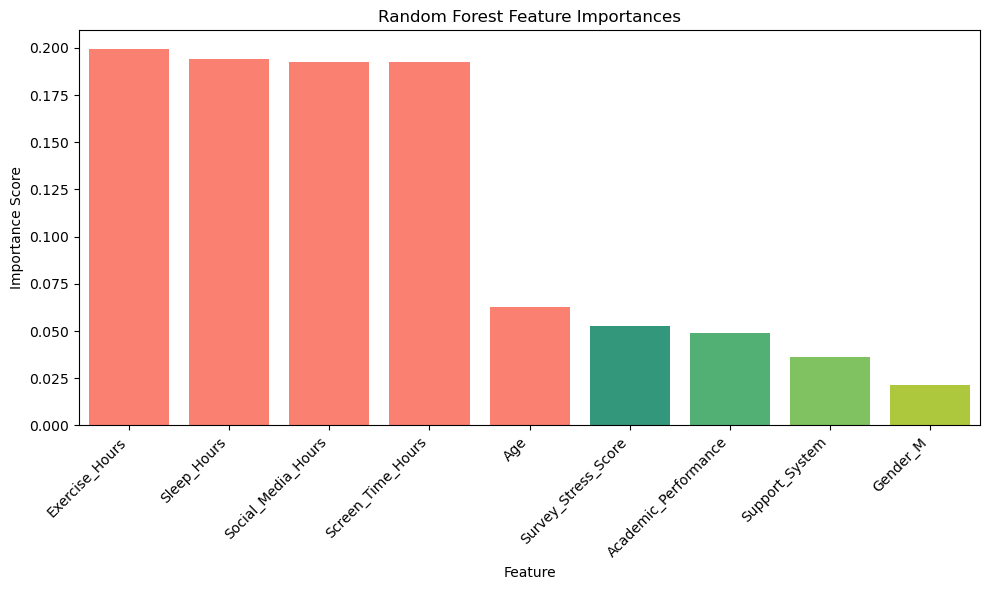

In [38]:
# Visualisation of Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.values, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')

# Highlight the top 5 features
for i, feature in enumerate(feature_importances.index):
    if feature in rf_top_5_features:
        plt.gca().patches[i].set_facecolor('salmon')

plt.tight_layout()
plt.show()

In [39]:
print("Top 5 features by Random Forest Importance:", rf_top_5_features)

Top 5 features by Random Forest Importance: ['Exercise_Hours', 'Sleep_Hours', 'Social_Media_Hours', 'Screen_Time_Hours', 'Age']


## Hybrid Methods

#### Stability Selection

In [40]:
# It's generally a good practice to scale data for regularisation techniques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)


In [41]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.utils.random import check_random_state

def stability_selection(X, y, n_bootstrap=100, random_state=None):
    from sklearn.linear_model import LassoCV
    from sklearn.preprocessing import StandardScaler
    np.random.seed(random_state)
    
    n_samples, n_features = X.shape
    # Convert y to a numpy array for compatibility with slicing
    y = np.array(y)
    ny_press = StandardScaler()
    y = ny_press.fit_transform(y[:, None]).flatten()
    
    base_estimator = LassoCV(cv=5, random_state=random_state)
    coefs = np.zeros((n_bootstrap, n_features))
    
    for i in range(n_bootstrap):
        # Subsample with replacement
        subsample_indices = np.random.choice(np.arange(n_samples), size=n_samples, replace=True)
        base_estimator.fit(X[subsample_indices], y[subsample_indices])
        coefs[i, :] = base_estimator.coef_
    
    return np.mean(coefs != 0, axis=0)

In [42]:
# Compute stability scores
stability_scores = stability_selection(X_train_scaled, y_train, n_bootstrap=100, random_state=42)

# Convert stability scores to a pandas Series
feature_scores = pd.Series(stability_scores, index=all_features).sort_values(ascending=False)

# Define the threshold for stable features
stable_features_threshold = 0.8
stable_features = feature_scores[feature_scores > stable_features_threshold].index.tolist()

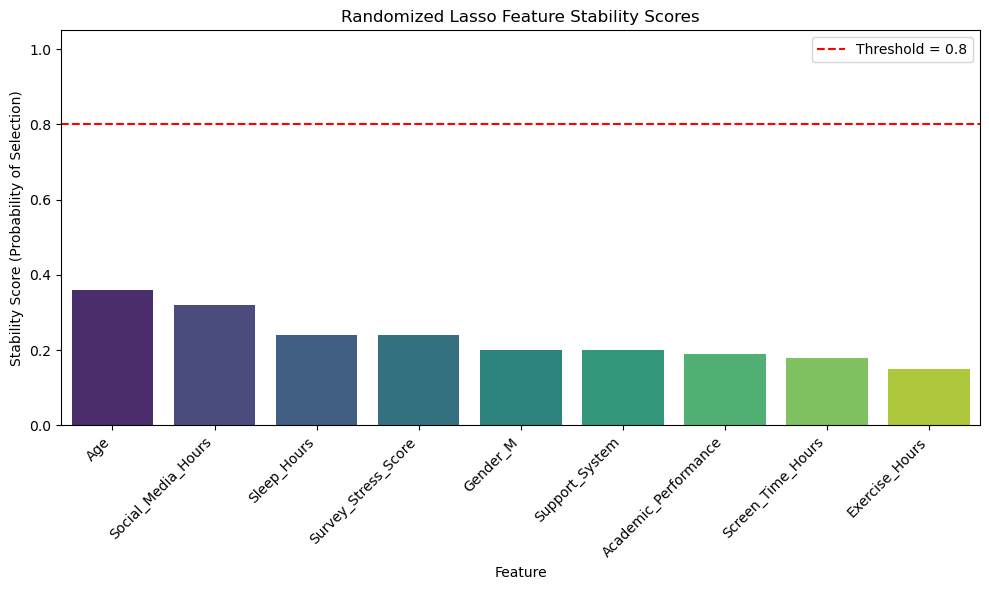

In [43]:
# Visualisation of Feature Stability Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores.index, y=feature_scores.values, palette='viridis')
plt.title('Randomized Lasso Feature Stability Scores')
plt.xlabel('Feature')
plt.ylabel('Stability Score (Probability of Selection)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)  # Set y-axis limit for probability

# Highlight stable features (score > 0.8)
for i, feature in enumerate(feature_scores.index):
    if feature in stable_features:
        plt.gca().patches[i].set_facecolor('salmon')

plt.axhline(y=stable_features_threshold, color='r', linestyle='--', label=f'Threshold = {stable_features_threshold}')
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
print(f"Stable features selected by Randomized Lasso (score > {stable_features_threshold}): {stable_features}")

Stable features selected by Randomized Lasso (score > 0.8): []


### Feature Shuffling Approach

In [45]:
from sklearn.inspection import permutation_importance

rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_preprocessed, y_train)

# Permutation Importance
perm = permutation_importance(rf, X_train_preprocessed, y_train, n_repeats=5, random_state=42) # Added random_state for reproducibility
perm_importances_mean = pd.Series(perm.importances_mean, index=all_features).sort_values(ascending=False)
perm_top_5_features = perm_importances_mean.nlargest(5).index.tolist()
perm_features = perm_importances_mean.nlargest().index.tolist()

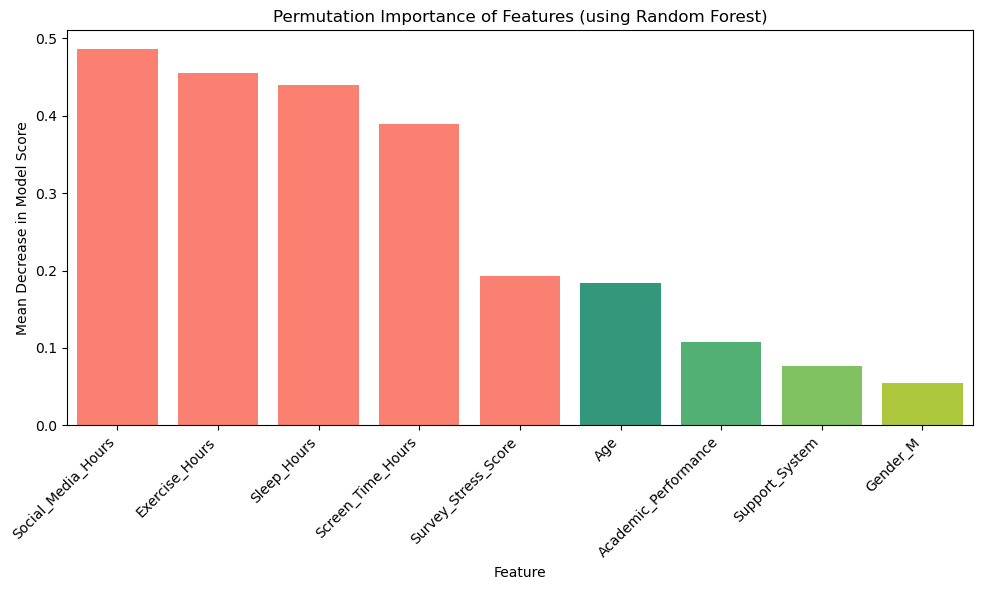

In [46]:
# Visualization of Permutation Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=perm_importances_mean.index, y=perm_importances_mean.values, palette='viridis')
plt.title('Permutation Importance of Features (using Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Mean Decrease in Model Score')
plt.xticks(rotation=45, ha='right')

# Highlight the top 5 features
for i, feature in enumerate(perm_importances_mean.index):
    if feature in perm_top_5_features:
        plt.gca().patches[i].set_facecolor('salmon')

plt.tight_layout()
plt.show()

In [47]:
print("Top 5 features by Permutation Importance:", perm_top_5_features)

Top 5 features by Permutation Importance: ['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score']


### Ensemble Feature Selection Method

In [48]:
from collections import defaultdict

feature_votes = defaultdict(int)
methods = {
    'corr': corr_features,
    'anova': anova_features,
    'rfe': rfe_features,
    'sfs': sfs_features,
    'lasso': lasso_features,
    'rf': rf_features,
    'stable': stable_features,
    'perm': perm_features
}

for method_name, features in methods.items():
    for feature in features:
        feature_votes[feature] += 1

# Get features selected by at least 3 methods
consensus_features = [k for k, v in feature_votes.items() if v >= 3]

### Visualisation & Final Selection

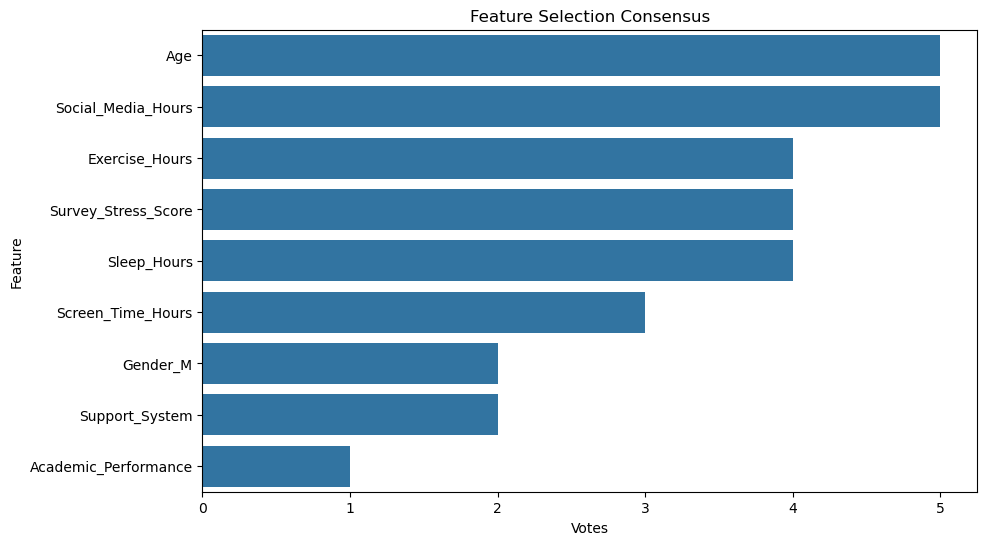

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature consensus plot
vote_counts = pd.DataFrame.from_dict(feature_votes, orient='index').reset_index()
vote_counts.columns = ['Feature', 'Votes']
vote_counts = vote_counts.sort_values('Votes', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Votes', y='Feature', data=vote_counts)
plt.title('Feature Selection Consensus')
plt.show()

## Final Modeling Pipeline

In [ ]:
# Define the Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
all_features

In [ ]:
# Define Consensus Features 
consensus_features = ['Age', 'Social_Media_Hours', 'Screen_Time_Hours', 'Exercise_Hours', 'Sleep_Hours',
                     'Survey_Stress_Score', 'Academic_Performance', 'Gender_M', 'Support_System'] 


In [ ]:
# Define the Pipeline with Feature Selection 
pipeline_with_fs = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', ColumnTransformer([
        ('select', 'passthrough', consensus_features)
    ], remainder='drop')),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [ ]:
# Define the Pipeline without Feature Selection 
pipeline_without_fs = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [ ]:
# Train and Evaluate Model WITH Feature Selection
#pipeline_with_fs.fit(X_train, y_train)

#y_pred_with_fs = pipeline_with_fs.predict(X_test)
#mse_with_fs = mean_squared_error(y_test, y_pred_with_fs)
#r2_with_fs = r2_score(y_test, r2_with_fs)

#print("--- Model Evaluation with Feature Selection ---")
#print(f"Mean Squared Error: {mse_with_fs:.4f}")
#print(f"R-squared: {r2_with_fs:.4f}")


In [ ]:
# Train and Evaluate Model WITHOUT Feature Selection
#pipeline_without_fs.fit(X_train, y_train)
#y_pred_without_fs = pipeline_without_fs.predict(X_test)
#mse_without_fs = mean_squared_error(y_test, y_pred_without_fs)
#r2_without_fs = r2_score(y_test, r2_without_fs)

#print("\n--- Model Evaluation without Feature Selection ---")
#print(f"Mean Squared Error: {mse_without_fs:.4f}")
#print(f"R-squared: {r2_without_fs:.4f}")